In [27]:
from fbprophet import Prophet
import pandas as pd
import datetime as dt

data1 = pd.read_csv('district_heat_date.txt', header=None)
data1.columns = ['ds']
data2 = pd.read_csv('district_heat.txt', header=None)
data2.columns = ['y']

df1 = pd.DataFrame({'ds':data1['ds']})
df2 = pd.DataFrame({'y':data2['y']})

data = pd.concat([df1, df2], axis = 1)
print(data)

                        ds       y
0     07-Jan-1990 15:00:00  198.91
1     07-Jan-1990 16:00:00  195.46
2     07-Jan-1990 17:00:00  196.43
3     07-Jan-1990 18:00:00  200.01
4     07-Jan-1990 19:00:00  199.99
...                    ...     ...
1338  04-Mar-1990 09:00:00  181.19
1339  04-Mar-1990 10:00:00  186.38
1340  04-Mar-1990 11:00:00  189.09
1341  04-Mar-1990 12:00:00  184.00
1342  04-Mar-1990 13:00:00  179.48

[1343 rows x 2 columns]


In [28]:
m = Prophet(daily_seasonality=True)
m.add_seasonality(
    name='daily', period=24, fourier_order=3, prior_scale=0.1)
m.fit(data)
future = m.make_future_dataframe(periods=168, freq='H')
future.tail()
#fig1 = m.plot(fcst)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
1498,1990-03-11 09:00:00
1499,1990-03-11 10:00:00
1500,1990-03-11 11:00:00
1501,1990-03-11 12:00:00
1502,1990-03-11 13:00:00


In [29]:
fcst = m.predict(future)
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

                      ds        yhat  yhat_lower  yhat_upper
0    1990-01-07 15:00:00  182.025799  165.582870  199.730218
1    1990-01-07 16:00:00  182.019665  164.676837  198.486745
2    1990-01-07 17:00:00  185.109470  169.102548  201.819850
3    1990-01-07 18:00:00  190.117311  173.284778  206.562447
4    1990-01-07 19:00:00  193.948423  178.025302  210.545390
...                  ...         ...         ...         ...
1498 1990-03-11 09:00:00  234.807350  212.395627  257.140032
1499 1990-03-11 10:00:00  232.233295  210.874544  255.926032
1500 1990-03-11 11:00:00  226.726440  205.747600  249.882485
1501 1990-03-11 12:00:00  221.196325  201.040895  243.594216
1502 1990-03-11 13:00:00  216.745029  194.788129  238.231554

[1503 rows x 4 columns]


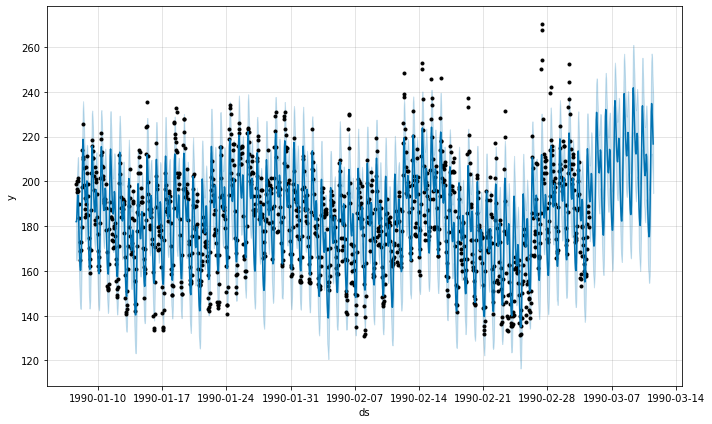

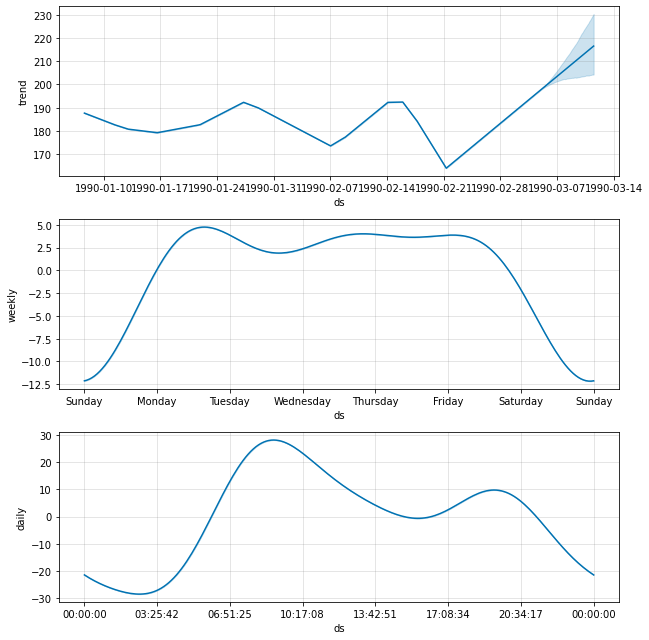

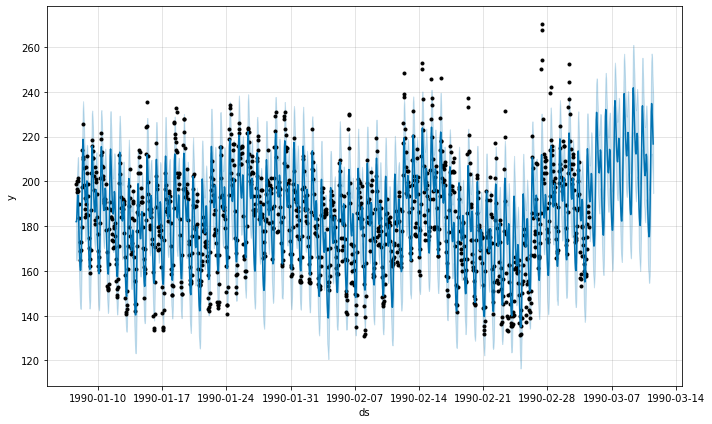

In [30]:
fig2 = m.plot_components(fcst)
m.plot(fcst)

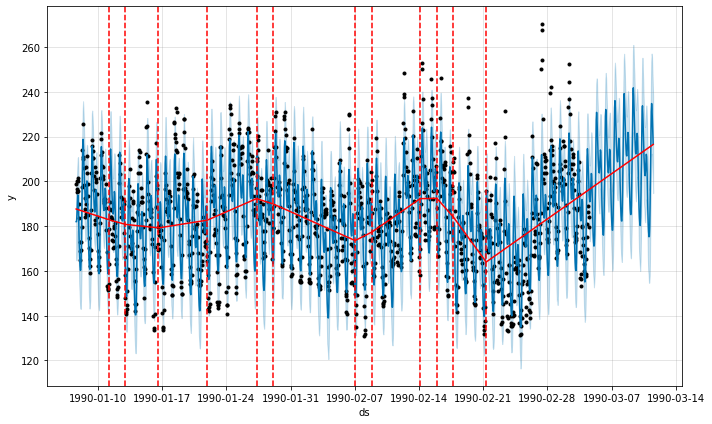

In [31]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

In [32]:
yhat = fcst.loc[:,['yhat']].tail(168)
#type(yhat)

In [33]:
print(yhat)
type(yhat)

            yhat
1335  193.101479
1336  190.909724
1337  191.080079
1338  194.346373
1339  199.530703
...          ...
1498  234.807350
1499  232.233295
1500  226.726440
1501  221.196325
1502  216.745029

[168 rows x 1 columns]


pandas.core.frame.DataFrame

In [34]:
#file = "yhat.h5";

#yhat.to_hdf(file, "C:\Time_Series_Analysis");
yhat.to_csv('yhat.csv')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


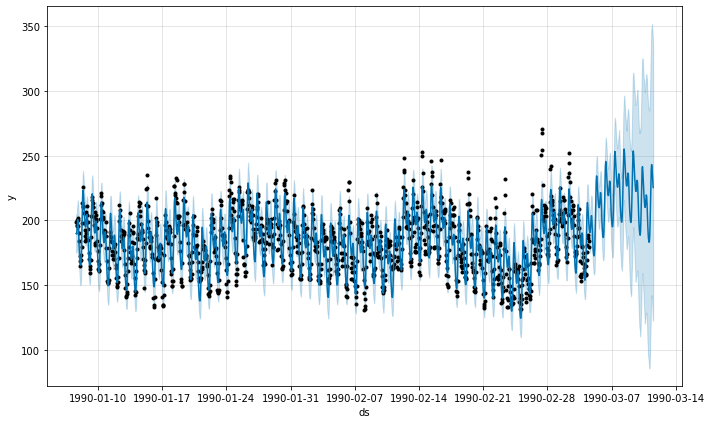

In [35]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(data).predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


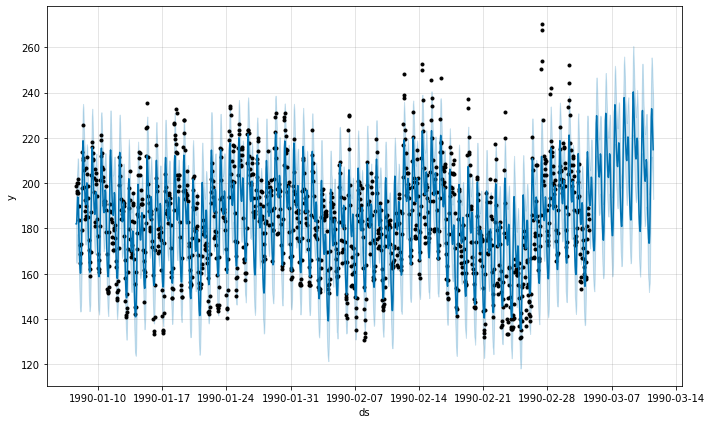

In [36]:
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(168, freq='H')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


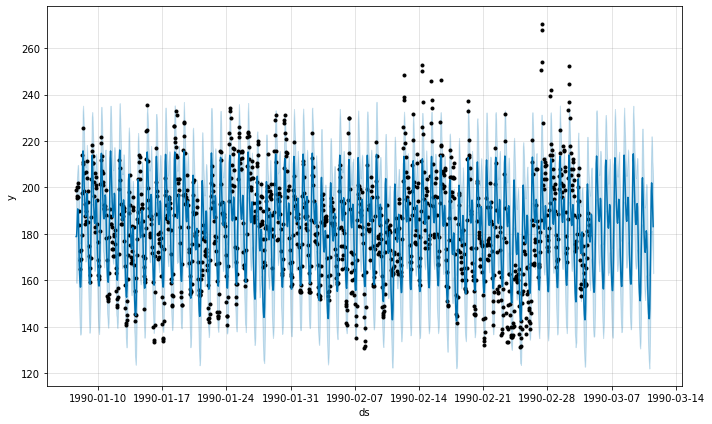

In [37]:
m = Prophet(changepoint_prior_scale=0.01).fit(data)
future = m.make_future_dataframe(periods=168, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

In [38]:
print(fcst)

                      ds       trend  yhat_lower  yhat_upper  trend_lower  \
0    1990-01-07 15:00:00  184.210247  159.225199  198.219799   184.210247   
1    1990-01-07 16:00:00  184.207386  158.859359  198.067018   184.207386   
2    1990-01-07 17:00:00  184.204526  161.997882  203.846589   184.204526   
3    1990-01-07 18:00:00  184.201665  166.367354  206.992376   184.201665   
4    1990-01-07 19:00:00  184.198804  169.910510  209.524933   184.198804   
...                  ...         ...         ...         ...          ...   
1498 1990-03-11 09:00:00  182.361474  181.345381  222.013372   182.286508   
1499 1990-03-11 10:00:00  182.364250  179.272932  218.996545   182.288878   
1500 1990-03-11 11:00:00  182.367025  173.594603  211.946568   182.291164   
1501 1990-03-11 12:00:00  182.369800  168.511332  207.932036   182.293240   
1502 1990-03-11 13:00:00  182.372576  163.062114  201.642548   182.295188   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upp

In [39]:
#file = "yhat.h5";

#yhat.to_hdf(file, "C:\Time_Series_Analysis");
yhat.to_csv('yhat.csv')

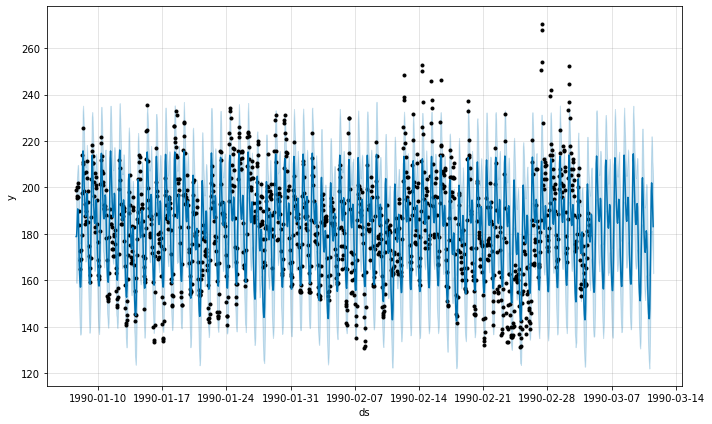

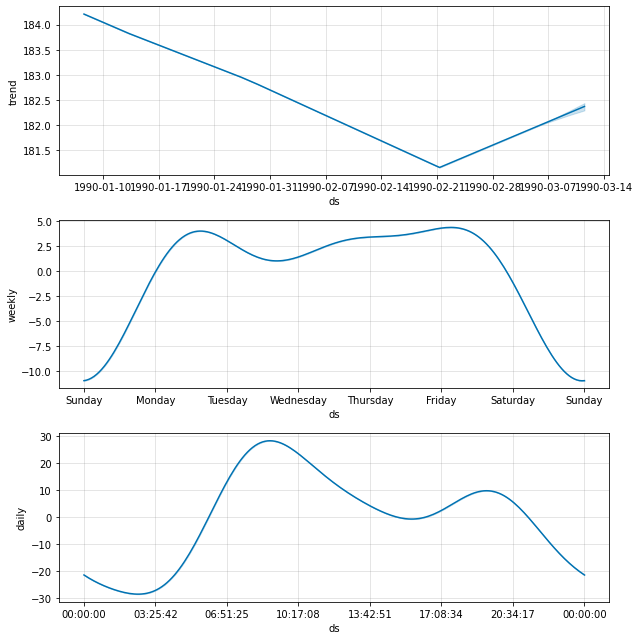

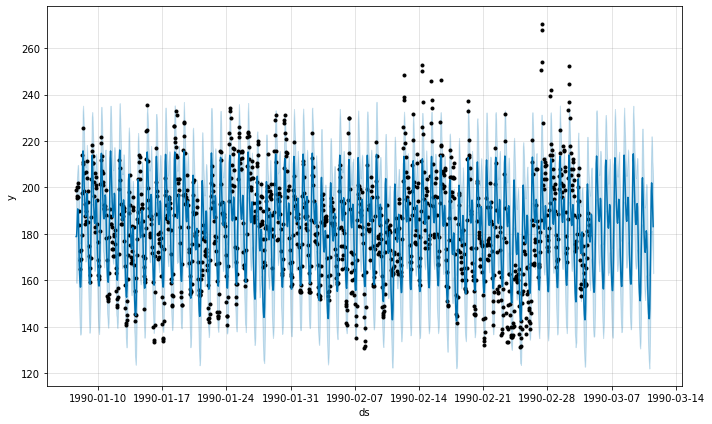

In [40]:
fig2 = m.plot_components(fcst)
m.plot(fcst)